
# Project: Investigate a Dataset (No_show_appointments)



<a id='intro'></a>
## Introduction

This dataset is about why do 30% of patients miss their scheduled appointments?

it contains 110.527 medical appointments in Brazil and if the patient showed up or not

The dataset provided us with information about every appointment such as gender, age, date of schedule, date of the actual appointment, neighborhood, scholarship, SMS-reminded

as well as an indication for one or more diseases, the patient might suffer. The possible options for these diseases like hypertension, diabetes.

### Questions

1-what the affecting of SMS reminders on the patients' attendance?

2-What is the relationship between Gender and Age with no-shows


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Read the Dataset
df = pd.read_csv('KaggleV2-May-2016.csv')


In [4]:
##Check columns names

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
#Display the first 10 rows 
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [6]:
# a brief summary for the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#checking the duplicated values


sum(df.duplicated())


0

In [8]:
#Check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#checking the data set info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Summery 

the data have 14 columns, 8 columns with type int , 1 with type float64 , 5 object 

no missing or duplicates values

the columns (PatiendID , AppointmentID) are not necessary and will be dropped.

the columns Scholarship, Hipertension, Diabetes, Alcoholism and SMS_received are binary (0,1) 0 for no and 1 for yes , so we need to change the type of it to bool

the name of the column No-show need to be changed to avoid errors also we need to change the values to be 0 ,1 to and convert the type to bool


the age column have negative value which is not logic, so need to be checked

The types of ScheduledDay and Appointmentday need converted to DateTime



### Data Cleaning (will handle the issues that mentioned above)

In [11]:

#reomve unnecessary columns
df = df.drop(['PatientId', 'AppointmentID'], axis = 1)



In [12]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# converting the columns type to bool

df['Scholarship'] = df['Scholarship'].astype('bool')
df['Hipertension'] = df['Hipertension'].astype('bool')
df['Diabetes'] = df['Diabetes'].astype('bool')
df['Alcoholism'] = df['Alcoholism'].astype('bool')
df['SMS_received'] = df['SMS_received'].astype('bool')


In [14]:
#change 'No-show' column name
df.rename(columns = {'No-show':'No_show'}, inplace = True)


In [15]:
#change the values to 0 and 1
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace = True)


In [16]:
# converting the column type to bool

df['No_show'] = df['No_show'].astype('bool')


In [17]:
# converting the columns that have date to datetime 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [18]:
#check the data info after the data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  bool               
 6   Hipertension    110527 non-null  bool               
 7   Diabetes        110527 non-null  bool               
 8   Alcoholism      110527 non-null  bool               
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  bool               
 11  No_show         110527 non-null  bool               
dtypes: bool(6), datetime64[ns, UTC](2), int64(2), object(2)
memory usage: 5.

In [19]:
#check the unlogic values in age column
df['Age'][df['Age']<1].value_counts()


 0    3539
-1       1
Name: Age, dtype: int64

In [20]:
#create a funcation to reomve the  unlogic values
def reomve_unlogic_values(x):
    if x <1:
        x = np.nan
    return x   

In [21]:
#apply funcation on Age column
df['Age'] = df['Age'].apply(lambda x: reomve_unlogic_values(x))

In [22]:
#reomve the nan values
df.dropna(inplace=True)

In [23]:
#check the result
df.describe()

,Age,Handcap
count,106987.000000,106987.000000
mean,38.316085,0.022975
std,22.466214,0.164115
min,1.000000,0.000000
25%,19.000000,0.000000
50%,38.000000,0.000000
75%,56.000000,0.000000
max,115.000000,4.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what the affecting of SMS reminders on the patients' attendance)

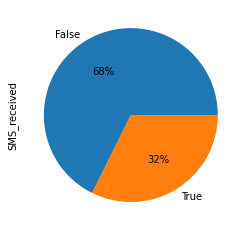

In [24]:
df["SMS_received"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

 only 32% from the Patients received the SMS

Text(0.5, 1.0, "Patients who didn't receive a SMS Reminder")

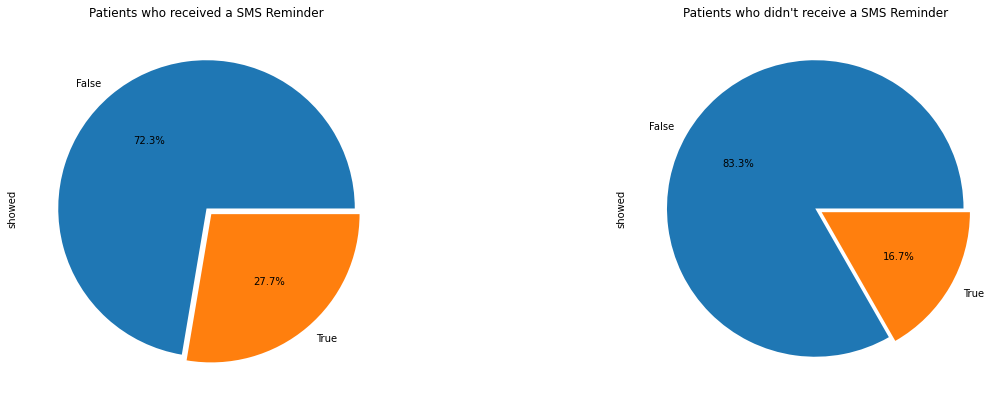

In [25]:
# create a new columns for Patients who came 

showed = df['No_show'] == True
not_showed = df['No_show'] == False
df['showed'] = showed

# create a var to use it in the plot

sms_yes= df[df['SMS_received']==True]['showed'].value_counts()

sms_no = df[df['SMS_received']==False]['showed'].value_counts()


# create a plot to answer the first Research

fig = plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sms_yes.plot.pie(autopct='%.1f%%',explode=(0, .05))
plt.title('Patients who received a SMS Reminder')

plt.subplot(2,2,2)
sms_no.plot.pie(autopct='%.1f%%',explode=(0, .05))
plt.title('Patients who didn\'t receive a SMS Reminder')


the above plot shown that the Patients that received sms attended more than the Patients didn't receive with  11%

### Research Question 2  (What is the relationship between Gender and Age with no-shows?


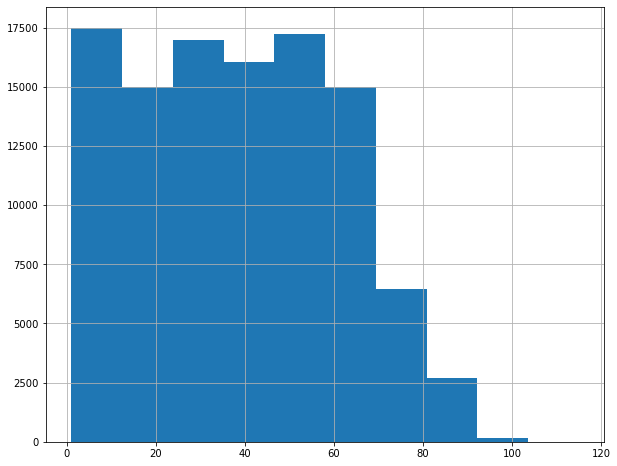

In [27]:

#   investigate.
df['Age'].hist(figsize=(10,8));

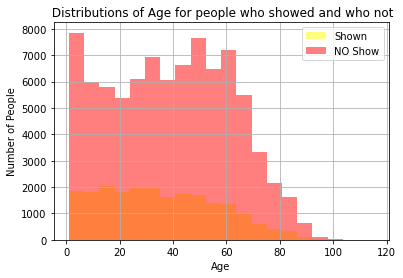

In [34]:
df['Age'][showed].hist(alpha = 0.5 ,bins =20,label = 'Shown' , color= "yellow"); 
df['Age'][not_showed].hist(alpha = 0.5 ,bins =20 ,label = 'NO Show', color= "red");

plt.title(" Distributions of Age for people who showed and who not")
plt.xlabel("Age")
plt.ylabel("Number of People")

plt.legend();

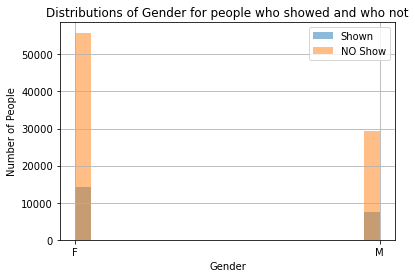

In [36]:
df['Gender'][showed].hist(alpha = 0.5 ,bins =20,label = 'Shown');
df['Gender'][not_showed].hist(alpha = 0.5 ,bins =20 ,label = 'NO Show');

plt.title("Distributions of Gender for people who showed and who not")
plt.xlabel("Gender")
plt.ylabel("Number of People")

plt.legend();

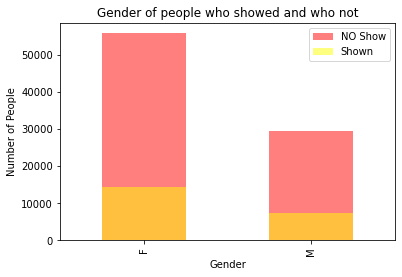

In [31]:
df['Gender'][not_showed].value_counts().plot(kind= "bar", alpha = 0.5,label = 'NO Show',color= "red");
df['Gender'][showed].value_counts().plot(kind= "bar", alpha = 0.5,label = 'Shown',color= "yellow");

plt.title("Gender of people who showed and who not")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend();

<a id='conclusions'></a>
## Conclusions

1- we found out that only 32% of the appointments had SMS messages received. and the Patients that received SMS attended more than the Patients didn't receive with  11%
 which mean we can suggest people to active SMS reminder services to increase the attendance 


2- as we can see the gender is affecting the attendance as most of both cases are from the females and we can also find out that most of the patients in the data is the females

for the age is also affecting the attendance as the most of the Patients that shown is kids (most probably are going with their parents) and the most others is between 20 and 50

# Limitations:


the features given is not enough, if we have more feature that impacts showing to the appointment such as if the patient is married, or not,  employed or not, or have medical insurance or not, the net salary or monthly income of the patient ,the average or appointment  cost